In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('precision', 5)

In [2]:
wind = pd.read_csv('powerproduction.txt')
wind

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
wind.columns

Index(['speed', 'power'], dtype='object')

In [4]:
wind.shape

(500, 2)

In [5]:
wind.isna().sum()

speed    0
power    0
dtype: int64

In [6]:
wind.isnull().sum()

speed    0
power    0
dtype: int64

In [7]:
wind.describe()

,speed,power
count,500.00000,500.00000
mean,12.59040,48.01458
std,7.22499,41.61457
min,0.00000,0.00000
25%,6.32475,5.28800
50%,12.55050,41.64550
75%,18.77525,93.53700
max,25.00000,113.55600


In [8]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


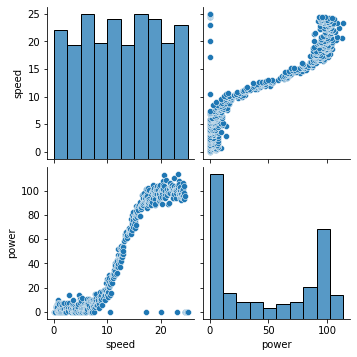

In [9]:
sns.pairplot(wind);

Seems to be some outliers here. I think its reasonable to assume that if the turbine was functioning porperly, there would be power output. So I will assume that these zero values for power, were for times when the turbine was offline due to maintenance or was malfunctioning.

In [10]:
wind = wind[wind['power'] != 0.000]

In [11]:
wind.describe()

,speed,power
count,451.00000,451.00000
mean,13.00430,53.23125
std,6.83598,40.52205
min,0.32500,0.06700
25%,7.34450,8.54350
50%,13.03800,58.16800
75%,18.78150,94.72550
max,24.39900,113.55600


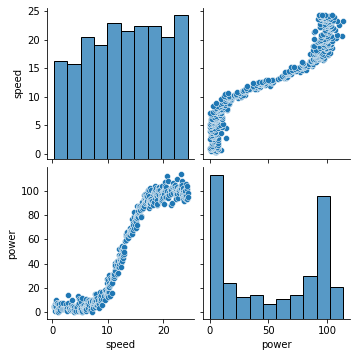

In [12]:
sns.pairplot(wind);

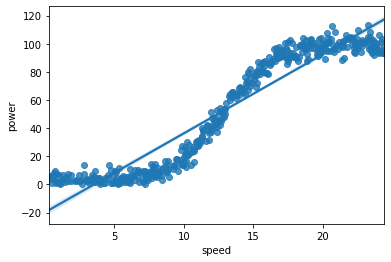

In [13]:
sns.regplot(x="speed", y="power", data=wind);

In [14]:
import sklearn.linear_model as lin

x = wind["speed"].to_numpy()
y = wind["power"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)
r = model.score(x, y)
p = [model.intercept_, model.coef_[0]]

In [15]:
r

0.8984832870534454

In [16]:
p

[-19.837685452108396, 5.618827837778541]

In [17]:
def f(x, p):
    return p[0] + x * p[1]

In [18]:
f(13,p)

53.207076439012646

In [19]:
def predict(x):
    return f(x,p)

In [20]:
predict(13)

53.207076439012646

In [21]:
predict(17.5)

78.49180170901607

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
x = wind["speed"].to_numpy()
y = wind["power"].to_numpy()

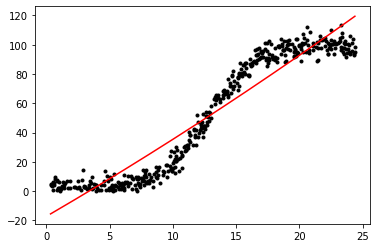

In [24]:
a,b,c = np.polyfit(x,y,2)
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x  +  c , 'r-');

In [25]:
a, b, c , d = np.polyfit(x, y, 3)

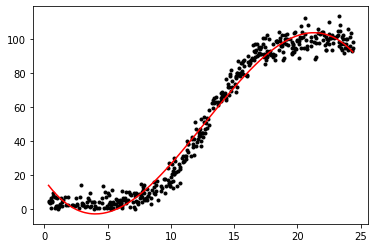

In [26]:
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x + b * x *x  +  c * x + d, 'r-');

In [27]:
p

[-19.837685452108396, 5.618827837778541]

In [28]:
import tensorflow.keras as kr

In [45]:
model = kr.models.Sequential()

In [46]:
model.add(kr.layers.Dense(1, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))

In [47]:
model.compile('adam', loss='mean_squared_error')

In [48]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 4ms/step - loss: 4527.5674
Epoch 2/500
46/46 [==============================] - 0s 4ms/step - loss: 4522.7515
Epoch 3/500
46/46 [==============================] - 0s 3ms/step - loss: 4518.0137
Epoch 4/500
46/46 [==============================] - 0s 3ms/step - loss: 4513.1743
Epoch 5/500
46/46 [==============================] - 0s 3ms/step - loss: 4508.3442
Epoch 6/500
46/46 [==============================] - 0s 3ms/step - loss: 4503.5693
Epoch 7/500
46/46 [==============================] - 0s 3ms/step - loss: 4498.7710
Epoch 8/500
46/46 [==============================] - 0s 3ms/step - loss: 4493.9360
Epoch 9/500
46/46 [==============================] - 0s 3ms/step - loss: 4489.0786
Epoch 10/500
46/46 [==============================] - 0s 3ms/step - loss: 4483.5996
Epoch 11/500
46/46 [==============================] - 0s 4ms/step - loss: 4467.4165: 0s - loss: 4325.
Epoch 12/500
46/46 [==============================] - 0s 3ms/step -

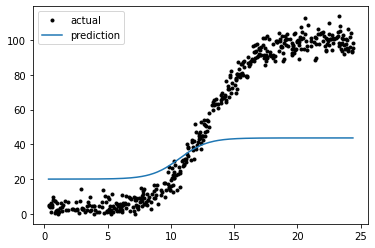

In [51]:
plt.plot(x, y,'k.', label='actual')
plt.plot(x, model.predict(x), label='prediction')
plt.legend();

In [52]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(10, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [53]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 3ms/step - loss: 4310.8203
Epoch 2/500
46/46 [==============================] - 0s 3ms/step - loss: 4276.6138
Epoch 3/500
46/46 [==============================] - 0s 3ms/step - loss: 4239.4199
Epoch 4/500
46/46 [==============================] - 0s 3ms/step - loss: 4191.0527
Epoch 5/500
46/46 [==============================] - 0s 3ms/step - loss: 4141.0991
Epoch 6/500
46/46 [==============================] - 0s 3ms/step - loss: 4102.3862
Epoch 7/500
46/46 [==============================] - 0s 3ms/step - loss: 4062.3154
Epoch 8/500
46/46 [==============================] - 0s 3ms/step - loss: 3990.7661
Epoch 9/500
46/46 [==============================] - 0s 3ms/step - loss: 3912.4739
Epoch 10/500
46/46 [==============================] - 0s 3ms/step - loss: 3857.7119
Epoch 11/500
46/46 [==============================] - 0s 3ms/step - loss: 3818.3010
Epoch 12/500
46/46 [==============================] - 0s 3ms/step - loss: 3783.1648
E

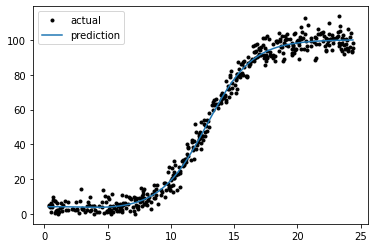

In [54]:
plt.plot(x, y,'k.', label='actual')
plt.plot(x, model.predict(x), label='prediction')
plt.legend();

In [55]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(10, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [56]:
model.fit(x, y, epochs=750, batch_size=10)

Epoch 1/750
46/46 [==============================] - 0s 3ms/step - loss: 4359.2666
Epoch 2/750
46/46 [==============================] - 0s 3ms/step - loss: 4273.4155
Epoch 3/750
46/46 [==============================] - 0s 3ms/step - loss: 4185.8945
Epoch 4/750
46/46 [==============================] - 0s 4ms/step - loss: 4095.5417
Epoch 5/750
46/46 [==============================] - 0s 4ms/step - loss: 4004.0183
Epoch 6/750
46/46 [==============================] - 0s 5ms/step - loss: 3887.2058
Epoch 7/750
46/46 [==============================] - 0s 5ms/step - loss: 3745.6738
Epoch 8/750
46/46 [==============================] - 0s 5ms/step - loss: 3655.5183
Epoch 9/750
46/46 [==============================] - 0s 4ms/step - loss: 3586.7690
Epoch 10/750
46/46 [==============================] - 0s 4ms/step - loss: 3524.2083
Epoch 11/750
46/46 [==============================] - 0s 4ms/step - loss: 3466.2295
Epoch 12/750
46/46 [==============================] - 0s 3ms/step - loss: 3409.3618
E

In [60]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(20, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [61]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 4ms/step - loss: 4325.7085
Epoch 2/500
46/46 [==============================] - 0s 3ms/step - loss: 4250.7168
Epoch 3/500
46/46 [==============================] - 0s 4ms/step - loss: 4167.2681
Epoch 4/500
46/46 [==============================] - 0s 4ms/step - loss: 4056.5281
Epoch 5/500
46/46 [==============================] - 0s 4ms/step - loss: 3943.8728
Epoch 6/500
46/46 [==============================] - 0s 4ms/step - loss: 3831.0308
Epoch 7/500
46/46 [==============================] - 0s 4ms/step - loss: 3688.4873
Epoch 8/500
46/46 [==============================] - 0s 4ms/step - loss: 3588.0107
Epoch 9/500
46/46 [==============================] - 0s 3ms/step - loss: 3513.0808
Epoch 10/500
46/46 [==============================] - 0s 3ms/step - loss: 3444.8567
Epoch 11/500
46/46 [==============================] - 0s 3ms/step - loss: 3381.6509
Epoch 12/500
46/46 [==============================] - 0s 3ms/step - loss: 3322.7637
E

In [62]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(20, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [63]:
model.fit(x, y, epochs=750, batch_size=10)

Epoch 1/750
46/46 [==============================] - 0s 4ms/step - loss: 4241.2524
Epoch 2/750
46/46 [==============================] - 0s 3ms/step - loss: 4138.1372
Epoch 3/750
46/46 [==============================] - 0s 4ms/step - loss: 4030.2864
Epoch 4/750
46/46 [==============================] - 0s 4ms/step - loss: 3931.6370
Epoch 5/750
46/46 [==============================] - 0s 4ms/step - loss: 3844.0745
Epoch 6/750
46/46 [==============================] - 0s 3ms/step - loss: 3755.6626
Epoch 7/750
46/46 [==============================] - 0s 3ms/step - loss: 3675.1135
Epoch 8/750
46/46 [==============================] - 0s 3ms/step - loss: 3601.1406
Epoch 9/750
46/46 [==============================] - 0s 3ms/step - loss: 3527.7866
Epoch 10/750
46/46 [==============================] - 0s 3ms/step - loss: 3460.4426
Epoch 11/750
46/46 [==============================] - 0s 3ms/step - loss: 3398.9736
Epoch 12/750
46/46 [==============================] - 0s 4ms/step - loss: 3338.3484
E

In [72]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(9, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [73]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 4ms/step - loss: 4353.4512
Epoch 2/500
46/46 [==============================] - 0s 4ms/step - loss: 4326.7319
Epoch 3/500
46/46 [==============================] - 0s 4ms/step - loss: 4305.6548
Epoch 4/500
46/46 [==============================] - 0s 4ms/step - loss: 4281.6880
Epoch 5/500
46/46 [==============================] - 0s 4ms/step - loss: 4246.5591
Epoch 6/500
46/46 [==============================] - 0s 3ms/step - loss: 4202.7798
Epoch 7/500
46/46 [==============================] - 0s 4ms/step - loss: 4074.5847
Epoch 8/500
46/46 [==============================] - 0s 4ms/step - loss: 3921.9905
Epoch 9/500
46/46 [==============================] - 0s 4ms/step - loss: 3850.1853
Epoch 10/500
46/46 [==============================] - 0s 3ms/step - loss: 3801.4287
Epoch 11/500
46/46 [==============================] - 0s 3ms/step - loss: 3760.1921
Epoch 12/500
46/46 [==============================] - 0s 3ms/step - loss: 3722.5681
E

In [78]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(10, input_shape=(1,), activation='relu', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [79]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 3ms/step - loss: 5151.4126
Epoch 2/500
46/46 [==============================] - 0s 3ms/step - loss: 4808.9746
Epoch 3/500
46/46 [==============================] - 0s 3ms/step - loss: 4457.4575
Epoch 4/500
46/46 [==============================] - 0s 3ms/step - loss: 4079.4817
Epoch 5/500
46/46 [==============================] - 0s 3ms/step - loss: 3677.6763
Epoch 6/500
46/46 [==============================] - 0s 3ms/step - loss: 3263.4746
Epoch 7/500
46/46 [==============================] - 0s 3ms/step - loss: 2840.1672
Epoch 8/500
46/46 [==============================] - 0s 3ms/step - loss: 2406.3860
Epoch 9/500
46/46 [==============================] - 0s 3ms/step - loss: 1995.4150
Epoch 10/500
46/46 [==============================] - 0s 3ms/step - loss: 1607.1014
Epoch 11/500
46/46 [==============================] - 0s 3ms/step - loss: 1267.9650
Epoch 12/500
46/46 [==============================] - 0s 3ms/step - loss: 990.9218
Ep

In [80]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(10, input_shape=(1,), activation='softmax', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [81]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 3ms/step - loss: 4375.7803
Epoch 2/500
46/46 [==============================] - 0s 3ms/step - loss: 4364.0132
Epoch 3/500
46/46 [==============================] - 0s 3ms/step - loss: 4353.7065
Epoch 4/500
46/46 [==============================] - 0s 3ms/step - loss: 4344.0938
Epoch 5/500
46/46 [==============================] - 0s 3ms/step - loss: 4334.3735
Epoch 6/500
46/46 [==============================] - 0s 3ms/step - loss: 4324.8384
Epoch 7/500
46/46 [==============================] - 0s 3ms/step - loss: 4315.3672
Epoch 8/500
46/46 [==============================] - 0s 3ms/step - loss: 4305.8330
Epoch 9/500
46/46 [==============================] - 0s 3ms/step - loss: 4296.7104
Epoch 10/500
46/46 [==============================] - 0s 3ms/step - loss: 4287.6421
Epoch 11/500
46/46 [==============================] - 0s 4ms/step - loss: 4278.5327
Epoch 12/500
46/46 [==============================] - 0s 3ms/step - loss: 4269.5332
E

In [105]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(10, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [106]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 5ms/step - loss: 4498.1440
Epoch 2/500
46/46 [==============================] - 0s 5ms/step - loss: 4464.0620
Epoch 3/500
46/46 [==============================] - 0s 6ms/step - loss: 4425.6680
Epoch 4/500
46/46 [==============================] - 0s 6ms/step - loss: 4386.9287
Epoch 5/500
46/46 [==============================] - 0s 6ms/step - loss: 4349.9272
Epoch 6/500
46/46 [==============================] - 0s 5ms/step - loss: 4316.9282
Epoch 7/500
46/46 [==============================] - 0s 6ms/step - loss: 4286.4390
Epoch 8/500
46/46 [==============================] - 0s 5ms/step - loss: 4254.3110
Epoch 9/500
46/46 [==============================] - 0s 5ms/step - loss: 4221.2944
Epoch 10/500
46/46 [==============================] - 0s 5ms/step - loss: 4195.7202
Epoch 11/500
46/46 [==============================] - 0s 5ms/step - loss: 4172.1616
Epoch 12/500
46/46 [==============================] - 0s 5ms/step - loss: 4149.5928
E

In [107]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


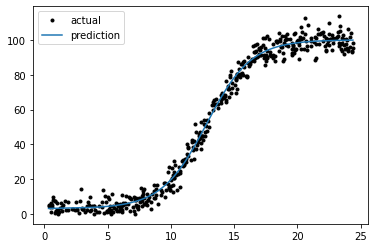

In [108]:
plt.plot(x, y,'k.', label='actual')
plt.plot(x, model.predict(x), label='prediction')
plt.legend();

In [120]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(10, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [121]:
model.fit(x, y, epochs=500, batch_size=2)

Epoch 1/500
226/226 [==============================] - 1s 3ms/step - loss: 4380.4355
Epoch 2/500
226/226 [==============================] - 1s 3ms/step - loss: 3927.5894
Epoch 3/500
226/226 [==============================] - 1s 3ms/step - loss: 3624.7620
Epoch 4/500
226/226 [==============================] - 1s 3ms/step - loss: 3421.3608
Epoch 5/500
226/226 [==============================] - 1s 5ms/step - loss: 3243.4709
Epoch 6/500
226/226 [==============================] - 1s 4ms/step - loss: 3082.1033
Epoch 7/500
226/226 [==============================] - 1s 4ms/step - loss: 2932.9153
Epoch 8/500
226/226 [==============================] - 1s 4ms/step - loss: 2794.0703
Epoch 9/500
226/226 [==============================] - 1s 3ms/step - loss: 2663.6946
Epoch 10/500
226/226 [==============================] - 1s 3ms/step - loss: 2541.3015
Epoch 11/500
226/226 [==============================] - 1s 3ms/step - loss: 2425.9160
Epoch 12/500
226/226 [==============================] - 1s 3ms/

In [122]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
